In [1]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
gpt3_load = './generatedDataFromGoogleDrive_gpt3/data/'
gpt4_load = './generatedDataFromGoogleDrive_gpt4/data/'

In [16]:
def wordcloud_generation(loadingFile, color_map_index, whichgpt):
    color_maps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Blues', 'Reds', 'Greens', 'Purples', 'cool', 'hot', 'spring', 'summer', 'autumn', 'winter']
    dpi = 100
    # load all files from data folder (generated in Google Colab)
    met_dfs = {}
    unmet_dfs = {}
    for file in os.listdir(loadingFile):
        if '.csv' in file:
            
            if 'unmet' in file:
                unmet_dfs[file.replace('.csv', '')] = pd.read_csv(f'{loadingFile}{file}')
            else:
                met_dfs[file.replace('.csv', '')] = pd.read_csv(f'{loadingFile}{file}')

    met_dfs = pd.concat(met_dfs)
    unmet_dfs = pd.concat(unmet_dfs)

    met_text = " ".join(review for review in met_dfs.report)
    unmet_text = " ".join(review for review in unmet_dfs.report)

    stopwords = set(STOPWORDS)
    # remove words that 
    stopwords.update(["palliative care", "palliative", "Mr", "today", "day", "afternoon", "morning", "breakfast", "lunch", "bed"])
    met_wordcloud = WordCloud(stopwords=stopwords, colormap=color_maps[color_map_index], random_state=64).generate(met_text)
    unmet_wordcloud = WordCloud(stopwords=stopwords, colormap=color_maps[color_map_index], random_state=64).generate(unmet_text)
    
    print(f"\n-------\nTop Words in Met Notes\n {list((met_wordcloud.words_).keys())[:10]}\n-------\n")
    print(f"\n-------\nTop Words in Unmet Notes\n {list((unmet_wordcloud.words_).keys())[:10]}\n-------\n")

    plt.figure(figsize=(20, 10))

    # save individual images
    plt.imshow(met_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'{whichgpt.upper()} Met Notes Word Cloud', size=20)
    plt.savefig(f'./graphs/{whichgpt}_met_word_cloud.png', bbox_inches='tight', dpi=dpi)

    plt.imshow(unmet_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'{whichgpt.upper()} Unmet Notes Word Cloud', size=20)
    plt.savefig(f'./graphs/{whichgpt}_unmet_word_cloud.png', bbox_inches='tight', dpi=dpi)

    # clear the plot
    plt.clf()

    plt.subplot(1, 2, 1)
    plt.imshow(met_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{whichgpt.upper()} Met Notes Word Cloud', size=20)

    plt.subplot(1, 2, 2)
    plt.imshow(unmet_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{whichgpt.upper()} UnMet Notes Word Cloud', size=20)
    
    plt.show()



-------
Top Words in Met Notes
 ['care plan', 'visit', 'enjoyed', 'experienced', 'participated', 'requested', 'medication', 'pain relief', 'family', 'room']
-------


-------
Top Words in Unmet Notes
 ['need', 'confusion', 'care team', 'review', 'agitation', 'restlessness', 'discomfort', 'complained', 'exhibited signs', 'pain management']
-------



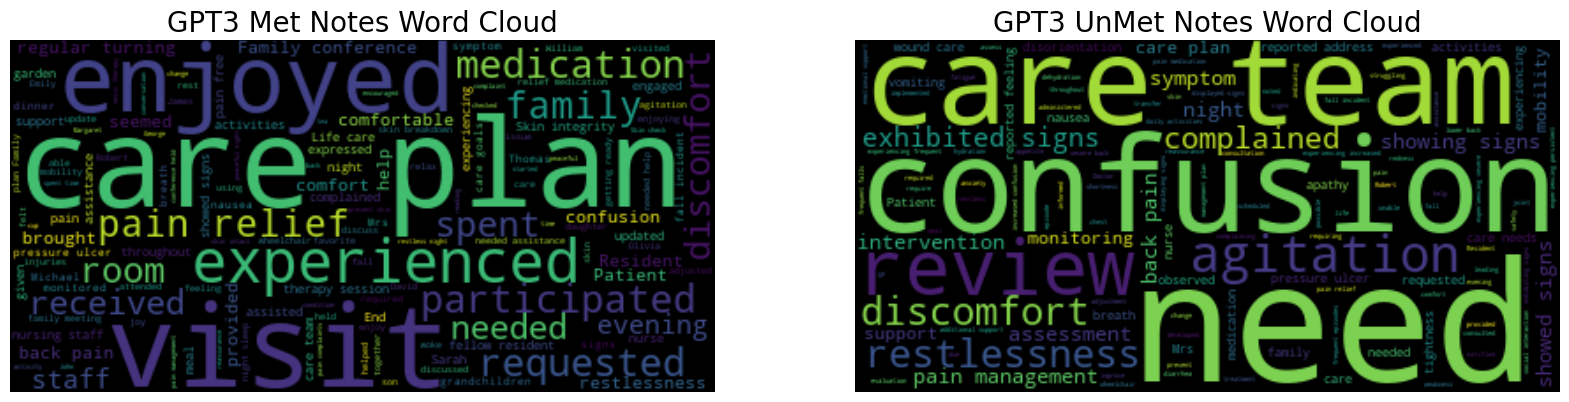

In [17]:
wordcloud_generation(gpt3_load, 0, 'gpt3')


-------
Top Words in Met Notes
 ['enjoyed', 'participated', 'seemed', 'Resident', 'night', 'full assistance', 'medication', 'meal', 'noted', 'required']
-------


-------
Top Words in Unmet Notes
 ['required', 'noted', 'night', 'staff', 'wheelchair', 'care plan', 'needed', 'seemed', 'throughout', 'confusion']
-------



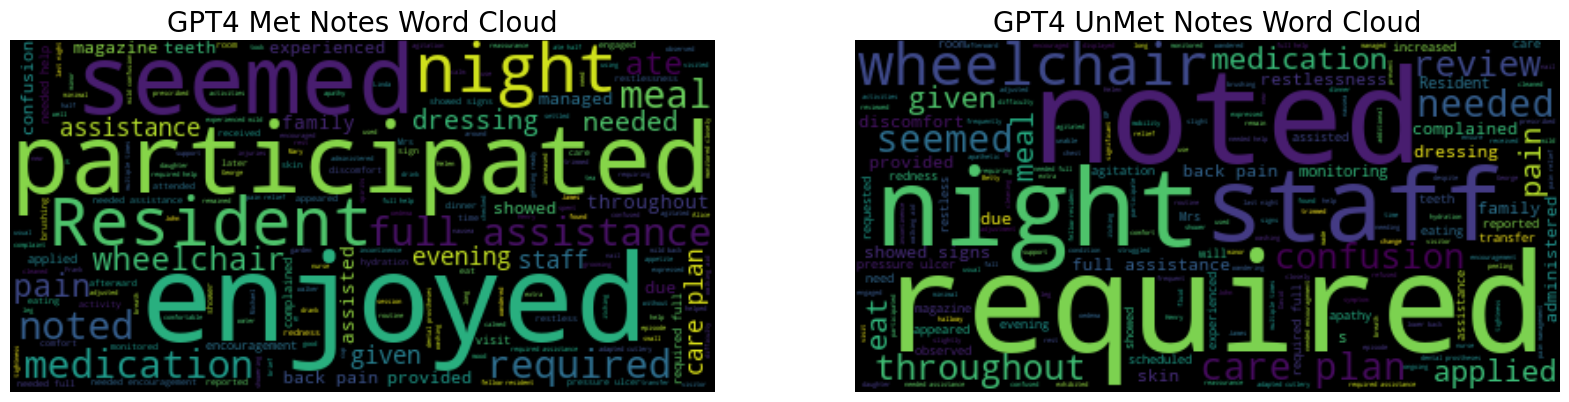

In [18]:
wordcloud_generation(gpt4_load, 0, 'gpt4')